In [1]:
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:100% !important;}</style>"))


In [57]:
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#선형회귀 데이터 생성
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X=2*np.random.rand(100,1) #노이즈도 같이 생성
y=4+3*X+np.random.randn(100,1)#노이즈도 같이 생성

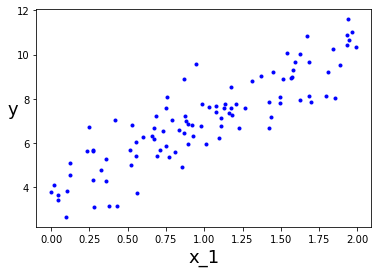

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("x_1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18) #rotation = 글자 회전
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] #모든 샘플에 x0=1을 추가

In [5]:
#정규 방정식을 이용해 파라미터 예측
#정규방정식 구현

theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # numpy.linalg.inv(a) - Compute the (multiplicative) inverse of a matrix.
theta_best # 4와 3을 기대했지만 노이즈 때문에 파라미터를 정확하게 예측하지 못함. 

array([[3.87073478],
       [3.20942827]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.87073478],
       [10.28959132]])

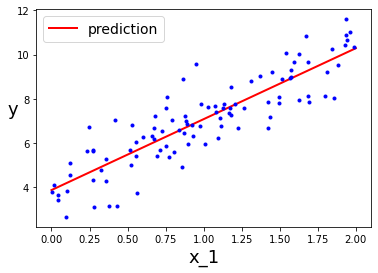

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("x_1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14) #범례의 위치와 폰트 사이즈
plt.show()

In [8]:
#사이킷런의 linear_model 활용
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.87073478]), array([[3.20942827]]))

In [9]:
lin_reg.predict(X_new) #정규방정식을 직접 구현했을 때와 결과가 같음.

array([[ 3.87073478],
       [10.28959132]])

In [10]:
#경사 하강법
eta=0.1 #학습률
n_iterations=200 #반복횟수
m=len(X_b) #샘플 개수
theta = np.random.randn(2,1) #초기 랜덤 세타

In [11]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #비용 함수의 그래디언 백터 식.
    theta = theta - eta * gradients  #경사하강법의 스텝

In [12]:
#그래디언 백터는 바용함수(파라미터당 1개씩)의 편도함수를 모두 담고있는 백터이다

In [13]:
theta

array([[3.86477355],
       [3.21458413]])

In [14]:
X_new_b.dot(theta) #정규방정식과 같은결과

array([[ 3.86477355],
       [10.29394181]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 20: #20번의 iteration동안만 선을 그림
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("x_1", fontsize=18)
    plt.title("eta = {}".format(eta), fontsize=16)

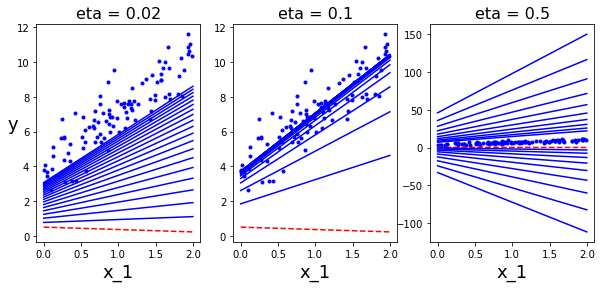

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [17]:
#학습률이 너무 낮으면, 최적점에 도달하는데 시간이 오래걸림(eta=0.02)
#학습률이 너무 높으면, 알고리즘에 이리저리 날뛰면서 스텝마다 최적점에서 멀어져 발산 (eta=0.5)

In [18]:
theta_path_bgd #eta 0.1 일때 theta의 변화

[array([[1.83588453],
        [1.39440079]]),
 array([[2.60305582],
        [2.26616205]]),
 array([[3.04378749],
        [2.76092421]]),
 array([[3.29818481],
        [3.04066555]]),
 array([[3.4461866 ],
        [3.19779993]]),
 array([[3.53340394],
        [3.28505155]]),
 array([[3.58586229],
        [3.33249998]]),
 array([[3.6184126 ],
        [3.35730503]]),
 array([[3.63953016],
        [3.36925528]]),
 array([[3.65405262],
        [3.37393373]]),
 array([[3.66474212],
        [3.37452398]]),
 array([[3.67317659],
        [3.37284066]]),
 array([[3.68025823],
        [3.36991746]]),
 array([[3.68650366],
        [3.36634251]]),
 array([[3.69220947],
        [3.36244978]]),
 array([[3.69754665],
        [3.3584283 ]]),
 array([[3.70261448],
        [3.35438442]]),
 array([[3.70747127],
        [3.35037735]]),
 array([[3.71215193],
        [3.3464395 ]]),
 array([[3.71667794],
        [3.34258798]]),
 array([[3.7210631 ],
        [3.33883121]]),
 array([[3.72531678],
        [3.3

In [19]:
#확률적 경사하강법
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

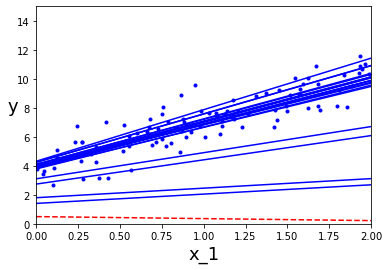

In [20]:
# 학습 스케줄을 사용한 확률적 경사하강법 구현.

n_epochs=50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("x_1", fontsize=18)                     
plt.ylabel("y", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                           
plt.show() 

In [21]:
theta

array([[3.88413285],
       [3.24462452]])

In [58]:
#사이킷런에서 SGDRefressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=5, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=5, penalty=None, random_state=42)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.74447354]), array([3.17652239]))

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

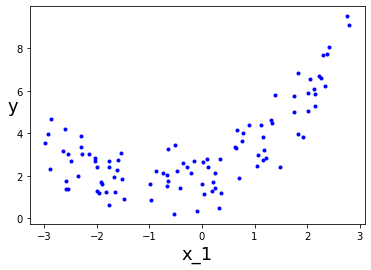

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("x_1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #훈련데이터 각 특성을 제곱하여 새로운 특성으로 추가
X_poly = poly_features.fit_transform(X)
X[0]

array([0.32022714])

In [27]:
X_poly[0]

array([0.32022714, 0.10254542])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_  
#intercept는 2 coef는 각각 1과 0.5 였는데 잘 맞춘거 같다.

(array([2.00533282]), array([[0.92694729, 0.50087548]]))

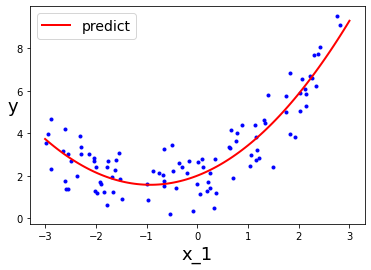

In [29]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) #-3 부터 3까지 100 구간으로 분할
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predict")
plt.xlabel("x_1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [30]:
#학습곡선
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#선형 회귀 모델의 학습 곡선
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Size of training data set", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)   

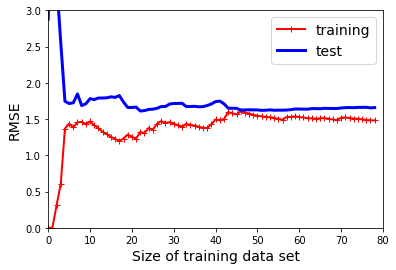

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])             
plt.show()

#데이터 셋이 커져도 rmse가 크게 유지된다. 과소적합.

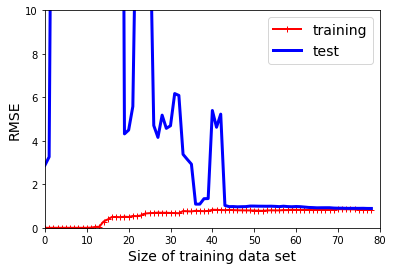

In [32]:
#10차 다항 회귀모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 10])           
plt.show()        

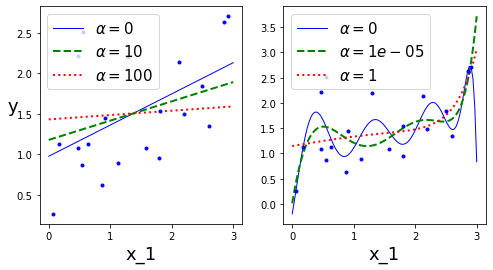

In [33]:
#규제가 있는 선형모델
#릿지회귀
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")): # (alpha,b-),(alpha,g--),(alpha,r:)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial: # if polynominal = True
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("x_1", fontsize=18)
    

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("y", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [34]:
#알파가 0이면 선형회귀와 같다
#알파값이 커지면 결국 모든 가중치(파라미터)가 0에가까워짐.-> 회귀식이 데이터의 평균을 지나는 수평선
#오른쪽 그래프를 보면 알파를 증가시킬수록(가중치에대한 규제가 커질수록) 직선에 가까워짐. 즉 모델의 분산은 줄어들지만 편향은 커짐

In [35]:
#sklearn에서 릿지 구현
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [36]:
sgd_reg = SGDRegressor(max_iter=50, penalty="l2", tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel()) #(20,1)->(20,0) 이 코드 없으면 경고창 뜸
sgd_reg.predict([[1.5]])

array([1.47012588])

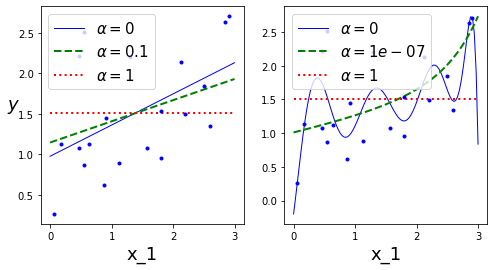

In [37]:
#라쏘회귀

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

In [38]:
#라쏘 회귀는 덜 중요한 특성의 가중치를 완전히 제거
# 1e-07만 되어도 거의 이차방정식에 가까워짐

In [39]:
#sklearn 에서 lasso 구현
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [41]:
#엘라스틱넷 (릿지+라쏘)
#sklearn에서 엘라스틱넷 구현 

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

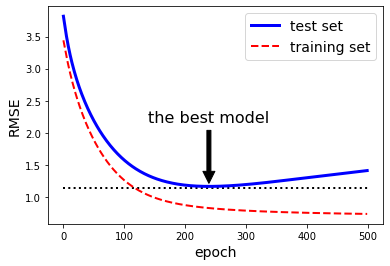

In [59]:
#조기종료
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('the best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [60]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,  #warm_start 메서드가 호출될때 이전 모델 파라미터에서 시작
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [44]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))

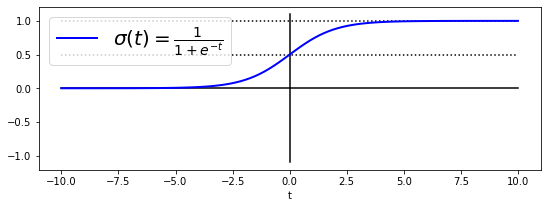

In [45]:
#로지스틱회귀
#로지스틱 함수

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.show()

In [46]:
# p(x)<0/5 이면 y=0 , p(x)>=0.5 이면 y=1

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [48]:
X = iris["data"][:, 3:]  # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica이면 1 아니면 0

In [49]:
#sklearn 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

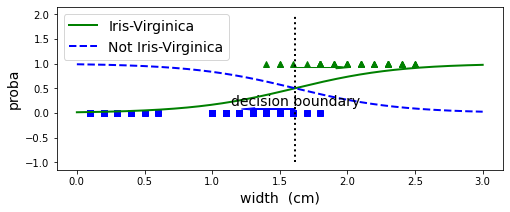

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "decision boundary ", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("width  (cm)", fontsize=14)
plt.ylabel("proba", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [51]:
#virginica는 꽃잎 넓이가 1.4~2.5cm에 분포함. 다른 꽃인 0.1~1.8cm에 분포한다.(중첩이 있음)

#위 그래프에서 녹색 선을 보면 꽃잎 넓이가 2cm 이상이면 세로축의 확률이 1에 근접한다. 즉 virginica라고 강력하게 예측한다.

In [52]:
decision_boundary


array([1.61561562])

In [53]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [55]:
#소프트맥스 회귀(다항 로지스틱회귀)
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

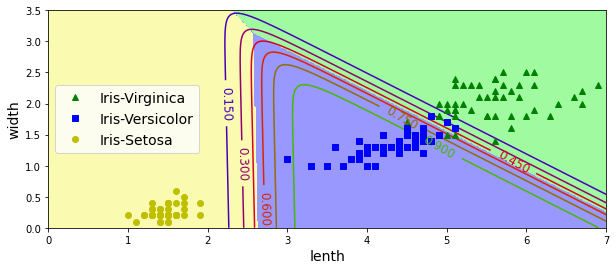

In [56]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("lenth", fontsize=14)
plt.ylabel("width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()